In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/NCAA_MARCH_MADNESS2015-2020.csv')

In [3]:
df[100:180]

TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
100       Miami FL   ACC  38  25  111.2   96.0   0.8446   49.9   47.6  15.9   
101     Pittsburgh   ACC  33  18  113.2  101.7   0.7749   49.1   50.0  15.7   
102       Syracuse   ACC  31  18  106.1   90.8   0.8565   47.3   46.4  17.9   
103  Virginia Tech   ACC  33  11  105.5  104.8   0.5204   51.5   50.8  18.1   
104    Wake Forest   ACC  32  13  104.8   98.1   0.6826   47.8   50.9  19.3   
..             ...   ...  ..  ..    ...    ...      ...    ...    ...   ...   
175        Houston  Amer  32  13  100.9  102.3   0.4593   46.5   49.1  20.5   
176        Memphis  Amer  32  18  104.7   95.1   0.7509   48.4   44.4  20.2   
177  South Florida  Amer  31   8   97.2  105.4   0.2812   47.3   49.1  20.9   
178         Temple  Amer  37  26  104.3   92.3   0.8029   44.2   44.5  14.6   
179         Tulane  Amer  30  14   97.6  101.8   0.3809   46.4   49.9  19.9   

     ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
100  ...  28.5  47.4  47.1  35.8  32.4   62.9   0.7         NaN   NaN  2015  
101  ...  37.8  48.6  49.0  33.6  34.9   60.9  -1.5         NaN   NaN  2015  
102  ...  30.0  48.3  45.9  30.0  31.4   66.4  -0.3         NaN   NaN  2015  
103  ...  33.8  47.7  49.6  38.9  35.1   64.2  -8.9         NaN   NaN  2015  
104  ...  35.2  46.5  51.1  33.6  33.8   68.7  -5.7         NaN   NaN  2015  
..   ...   ...   ...   ...   ...   ...    ...   ...         ...   ...   ...  
175  ...  33.2  45.2  48.4  32.0  33.7   64.6 -11.6         NaN   NaN  2015  
176  ...  38.7  48.1  43.8  32.8  30.4   66.6  -5.4         NaN   NaN  2015  
177  ...  42.5  47.7  45.4  30.9  37.4   64.4 -14.5         NaN   NaN  2015  
178  ...  33.5  43.4  43.3  30.4  31.4   65.9  -0.4         NaN   NaN  2015  
179  ...  36.1  45.5  49.6  32.0  33.7   63.7  -8.9         NaN   NaN  2015  

[80 rows x 24 columns]

In [4]:
df = df.fillna(0)

In [5]:
df['POSTSEASON'].unique()

array(['2ND', 'Champions', 'E8', 'F4', 0, 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [6]:
df['POSTSEASON']

0       2ND
1       2ND
2       2ND
3       2ND
4       2ND
       ... 
1752    S16
1753    S16
1754    S16
1755    S16
1756    S16
Name: POSTSEASON, Length: 1757, dtype: object

In [7]:
df = df.replace({'POSTSEASON': {'Champions': 1, '2ND': 2, 'F4': 3, 'E8': 4,'S16': 5, 'R32': 6, 'R64': 7, 'R68': 8}})

In [8]:
df = df.replace({'SEED': {0: 17}})

In [9]:
df['POSTSEASON'].unique()

array([2, 1, 4, 3, 0, 6, 7, 8, 5])

In [10]:
df['SEED'].unique()

array([ 1.,  3.,  2.,  4.,  6.,  9., 11., 10.,  7.,  5., 17.,  8., 16.,
       12., 13., 14., 15.])

In [11]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [12]:
#ReNaming columns
df = df.rename(columns={"G": "games_played", "W": "wins","ADJOE": "Adjusted Offensive Efficiency", "ADJDE": "Adjusted Defensive Efficiency",
                  "BARTHAG": "Power Rating", "EFG_O": "Effective_Field_Goal_Percentage_Shot","EFG_D": "Effective_Field_Goal_Percentage_Allowed", "TOR": "Turnover_Rate",
                  "TORD": "Steal_Rate", "ORB": "Offensive_Rebounds","DRB": "Defensive_Rebounds", "FTR": "Free_Throw_Rate",
                  "FTRD": "Free_Throw_Rate_Allowed", "2P_O": "Two_Point_Shooting_Percentage","2P_D": "Two_Point_Shooting_Percentage_Allowed", "3P_O": "Three_Point_Shooting_Percentage",
                  "3P_D": "Three_Point_Shooting_Percentage_Allowed", "ADJ_T": "Adjusted_Tempo","WAB": "Wins_Above_Bubble"})

In [13]:
df.columns

Index(['TEAM', 'CONF', 'games_played', 'wins', 'Adjusted Offensive Efficiency',
       'Adjusted Defensive Efficiency', 'Power Rating',
       'Effective_Field_Goal_Percentage_Shot',
       'Effective_Field_Goal_Percentage_Allowed', 'Turnover_Rate',
       'Steal_Rate', 'Offensive_Rebounds', 'Defensive_Rebounds',
       'Free_Throw_Rate', 'Free_Throw_Rate_Allowed',
       'Two_Point_Shooting_Percentage',
       'Two_Point_Shooting_Percentage_Allowed',
       'Three_Point_Shooting_Percentage',
       'Three_Point_Shooting_Percentage_Allowed', 'Adjusted_Tempo',
       'Wins_Above_Bubble', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [14]:
df['CONF'].unique()

array(['ACC', 'B10', 'B12', 'WCC', 'BE', 'P12', 'SEC', 'MVC', 'A10', 'AE',
       'Amer', 'ASun', 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz', 'Ind',
       'Ivy', 'MAAC', 'MAC', 'MEAC', 'MWC', 'NEC', 'OVC', 'Pat', 'SB',
       'SC', 'Slnd', 'Sum', 'SWAC', 'WAC'], dtype=object)

In [15]:
len(df['CONF'].unique())

33

In [16]:
#Create win percentage column
df['Win_Percentage'] = (df['wins']/df['games_played'])*100
df['Win_Percentage']

0       82.500000
1       90.000000
2       82.500000
3       81.578947
4       94.871795
          ...    
1752    62.857143
1753    80.000000
1754    86.111111
1755    77.142857
1756    86.486486
Name: Win_Percentage, Length: 1757, dtype: float64

In [17]:
df_n = df

In [18]:
#Dummify Conference for each team
def dummy_nv(X):
    '''
    X : Series passed in function
    Return x dataframe of all dummies
    '''
    x = pd.get_dummies(X, drop_first=True, dummy_na=False)
    return x

In [19]:
conff = dummy_nv(df['CONF'])
conff

ACC  AE  ASun  Amer  B10  B12  BE  BSky  BSth  BW  ...  P12  Pat  SB  \
0       1   0     0     0    0    0   0     0     0   0  ...    0    0   0   
1       0   0     0     0    1    0   0     0     0   0  ...    0    0   0   
2       0   0     0     0    1    0   0     0     0   0  ...    0    0   0   
3       0   0     0     0    0    1   0     0     0   0  ...    0    0   0   
4       0   0     0     0    0    0   0     0     0   0  ...    0    0   0   
...   ...  ..   ...   ...  ...  ...  ..   ...   ...  ..  ...  ...  ...  ..   
1752    0   0     0     0    0    0   0     0     0   0  ...    0    0   0   
1753    0   0     0     0    0    0   0     0     0   0  ...    0    0   0   
1754    0   0     0     0    0    0   0     0     0   0  ...    0    0   0   
1755    0   0     0     0    0    0   0     0     0   0  ...    0    0   0   
1756    0   0     0     0    0    0   0     0     0   0  ...    0    0   0   

      SC  SEC  SWAC  Slnd  Sum  WAC  WCC  
0      0    0     0     0    0    0    0  
1      0    0     0     0    0    0    0  
2      0    0     0     0    0    0    0  
3      0    0     0     0    0    0    0  
4      0    0     0     0    0    0    1  
...   ..  ...   ...   ...  ...  ...  ...  
1752   0    1     0     0    0    0    0  
1753   0    1     0     0    0    0    0  
1754   0    1     0     0    0    0    0  
1755   0    0     0     0    0    0    1  
1756   0    0     0     0    0    0    1  

[1757 rows x 32 columns]

In [20]:
teams = dummy_nv(df['TEAM'])
teams

Air Force  Akron  Alabama  Alabama A&M  Alabama St.  Albany  Alcorn St.  \
0             0      0        0            0            0       0           0   
1             0      0        0            0            0       0           0   
2             0      0        0            0            0       0           0   
3             0      0        0            0            0       0           0   
4             0      0        0            0            0       0           0   
...         ...    ...      ...          ...          ...     ...         ...   
1752          0      0        0            0            0       0           0   
1753          0      0        0            0            0       0           0   
1754          0      0        0            0            0       0           0   
1755          0      0        0            0            0       0           0   
1756          0      0        0            0            0       0           0   

      American  Appalachian St.  Arizona  ...  Wichita St.  William & Mary  \
0            0                0        0  ...            0               0   
1            0                0        0  ...            0               0   
2            0                0        0  ...            0               0   
3            0                0        0  ...            0               0   
4            0                0        0  ...            0               0   
...        ...              ...      ...  ...          ...             ...   
1752         0                0        0  ...            0               0   
1753         0                0        0  ...            0               0   
1754         0                0        0  ...            0               0   
1755         0                0        0  ...            0               0   
1756         0                0        0  ...            0               0   

      Winthrop  Wisconsin  Wofford  Wright St.  Wyoming  Xavier  Yale  \
0            0          0        0           0        0       0     0   
1            0          1        0           0        0       0     0   
2            0          0        0           0        0       0     0   
3            0          0        0           0        0       0     0   
4            0          0        0           0        0       0     0   
...        ...        ...      ...         ...      ...     ...   ...   
1752         0          0        0           0        0       0     0   
1753         0          0        0           0        0       0     0   
1754         0          0        0           0        0       0     0   
1755         0          0        0           0        0       0     0   
1756         0          0        0           0        0       0     0   

      Youngstown St.  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1752               0  
1753               0  
1754               0  
1755               0  
1756               0  

[1757 rows x 354 columns]

In [21]:
#Adding dummys to dataframe
df = pd.concat([df,conff],axis=1)

In [22]:
df = pd.concat([df,teams],axis=1)

In [23]:
df.head()

TEAM CONF  games_played  wins  Adjusted Offensive Efficiency  \
0  North Carolina  ACC            40    33                          123.3   
1       Wisconsin  B10            40    36                          129.1   
2        Michigan  B10            40    33                          114.4   
3      Texas Tech  B12            38    31                          115.2   
4         Gonzaga  WCC            39    37                          117.8   

   Adjusted Defensive Efficiency  Power Rating  \
0                           94.9        0.9531   
1                           93.6        0.9758   
2                           90.4        0.9375   
3                           85.2        0.9696   
4                           86.3        0.9728   

   Effective_Field_Goal_Percentage_Shot  \
0                                  52.6   
1                                  54.8   
2                                  53.9   
3                                  53.5   
4                                  56.6   

   Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  ...  Wichita St.  \
0                                     48.1           15.4  ...            0   
1                                     47.7           12.4  ...            0   
2                                     47.7           14.0  ...            0   
3                                     43.0           17.7  ...            0   
4                                     41.1           16.2  ...            0   

   William & Mary  Winthrop  Wisconsin  Wofford  Wright St.  Wyoming  Xavier  \
0               0         0          0        0           0        0       0   
1               0         0          1        0           0        0       0   
2               0         0          0        0           0        0       0   
3               0         0          0        0           0        0       0   
4               0         0          0        0           0        0       0   

   Yale  Youngstown St.  
0     0               0  
1     0               0  
2     0               0  
3     0               0  
4     0               0  

[5 rows x 411 columns]

In [24]:
df_n.head()

TEAM CONF  games_played  wins  Adjusted Offensive Efficiency  \
0  North Carolina  ACC            40    33                          123.3   
1       Wisconsin  B10            40    36                          129.1   
2        Michigan  B10            40    33                          114.4   
3      Texas Tech  B12            38    31                          115.2   
4         Gonzaga  WCC            39    37                          117.8   

   Adjusted Defensive Efficiency  Power Rating  \
0                           94.9        0.9531   
1                           93.6        0.9758   
2                           90.4        0.9375   
3                           85.2        0.9696   
4                           86.3        0.9728   

   Effective_Field_Goal_Percentage_Shot  \
0                                  52.6   
1                                  54.8   
2                                  53.9   
3                                  53.5   
4                                  56.6   

   Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  ...  \
0                                     48.1           15.4  ...   
1                                     47.7           12.4  ...   
2                                     47.7           14.0  ...   
3                                     43.0           17.7  ...   
4                                     41.1           16.2  ...   

   Two_Point_Shooting_Percentage  Two_Point_Shooting_Percentage_Allowed  \
0                           53.9                                   44.6   
1                           54.8                                   44.7   
2                           54.7                                   46.8   
3                           52.8                                   41.9   
4                           56.3                                   40.0   

   Three_Point_Shooting_Percentage  Three_Point_Shooting_Percentage_Allowed  \
0                             32.7                                     36.2   
1                             36.5                                     37.5   
2                             35.2                                     33.2   
3                             36.5                                     29.7   
4                             38.2                                     29.0   

   Adjusted_Tempo  Wins_Above_Bubble  POSTSEASON  SEED  YEAR  Win_Percentage  
0            71.7                8.6           2   1.0  2016       82.500000  
1            59.3               11.3           2   1.0  2015       90.000000  
2            65.9                6.9           2   3.0  2018       82.500000  
3            67.5                7.0           2   3.0  2019       81.578947  
4            71.5                7.7           2   1.0  2017       94.871795  

[5 rows x 25 columns]

In [25]:
df.corr()

games_played      wins  \
games_played                       1.000000  0.708838   
wins                               0.708838  1.000000   
Adjusted Offensive Efficiency      0.613432  0.754532   
Adjusted Defensive Efficiency     -0.606166 -0.690753   
Power Rating                       0.688059  0.814512   
...                                     ...       ...   
Wright St.                         0.001580  0.020300   
Wyoming                            0.018004  0.005605   
Xavier                             0.087808  0.066018   
Yale                              -0.047693  0.025199   
Youngstown St.                    -0.027163 -0.053174   

                               Adjusted Offensive Efficiency  \
games_played                                        0.613432   
wins                                                0.754532   
Adjusted Offensive Efficiency                       1.000000   
Adjusted Defensive Efficiency                      -0.528576   
Power Rating                                        0.870686   
...                                                      ...   
Wright St.                                         -0.014355   
Wyoming                                            -0.006016   
Xavier                                              0.090544   
Yale                                                0.020465   
Youngstown St.                                     -0.009966   

                               Adjusted Defensive Efficiency  Power Rating  \
games_played                                       -0.606166      0.688059   
wins                                               -0.690753      0.814512   
Adjusted Offensive Efficiency                      -0.528576      0.870686   
Adjusted Defensive Efficiency                       1.000000     -0.852432   
Power Rating                                       -0.852432      1.000000   
...                                                      ...           ...   
Wright St.                                         -0.023467      0.006565   
Wyoming                                            -0.003818      0.001223   
Xavier                                             -0.055499      0.080713   
Yale                                               -0.020164      0.028480   
Youngstown St.                                      0.075768     -0.051504   

                               Effective_Field_Goal_Percentage_Shot  \
games_played                                               0.346425   
wins                                                       0.617839   
Adjusted Offensive Efficiency                              0.732683   
Adjusted Defensive Efficiency                             -0.221381   
Power Rating                                               0.543153   
...                                                             ...   
Wright St.                                                 0.007503   
Wyoming                                                    0.026621   
Xavier                                                     0.050178   
Yale                                                       0.041301   
Youngstown St.                                            -0.017761   

                               Effective_Field_Goal_Percentage_Allowed  \
games_played                                                 -0.481942   
wins                                                         -0.609144   
Adjusted Offensive Efficiency                                -0.333693   
Adjusted Defensive Efficiency                                 0.792320   
Power Rating                                                 -0.627696   
...                                                                ...   
Wright St.                                                    0.006114   
Wyoming                                                      -0.020795   
Xavier                                                       -0.005845   
Yale                                           

In [26]:
df_n.corr()

games_played      wins  \
games_played                                 1.000000  0.708838   
wins                                         0.708838  1.000000   
Adjusted Offensive Efficiency                0.613432  0.754532   
Adjusted Defensive Efficiency               -0.606166 -0.690753   
Power Rating                                 0.688059  0.814512   
Effective_Field_Goal_Percentage_Shot         0.346425  0.617839   
Effective_Field_Goal_Percentage_Allowed     -0.481942 -0.609144   
Turnover_Rate                               -0.336407 -0.467073   
Steal_Rate                                   0.065020  0.138805   
Offensive_Rebounds                           0.261046  0.296395   
Defensive_Rebounds                          -0.184134 -0.366715   
Free_Throw_Rate                              0.090549  0.126931   
Free_Throw_Rate_Allowed                     -0.279593 -0.329245   
Two_Point_Shooting_Percentage                0.339290  0.585806   
Two_Point_Shooting_Percentage_Allowed       -0.439340 -0.529558   
Three_Point_Shooting_Percentage              0.225821  0.432743   
Three_Point_Shooting_Percentage_Allowed     -0.349726 -0.485485   
Adjusted_Tempo                              -0.040433 -0.016057   
Wins_Above_Bubble                            0.666595  0.905029   
POSTSEASON                                   0.434666  0.548941   
SEED                                        -0.559288 -0.611352   
YEAR                                         0.052233  0.091829   
Win_Percentage                               0.564318  0.979314   

                                         Adjusted Offensive Efficiency  \
games_played                                                  0.613432   
wins                                                          0.754532   
Adjusted Offensive Efficiency                                 1.000000   
Adjusted Defensive Efficiency                                -0.528576   
Power Rating                                                  0.870686   
Effective_Field_Goal_Percentage_Shot                          0.732683   
Effective_Field_Goal_Percentage_Allowed                      -0.333693   
Turnover_Rate                                                -0.601024   
Steal_Rate                                                   -0.116231   
Offensive_Rebounds                                            0.261351   
Defensive_Rebounds                                           -0.266665   
Free_Throw_Rate                                               0.063637   
Free_Throw_Rate_Allowed                                      -0.382290   
Two_Point_Shooting_Percentage                                 0.646011   
Two_Point_Shooting_Percentage_Allowed                        -0.328822   
Three_Point_Shooting_Percentage                               0.579193   
Three_Point_Shooting_Percentage_Allowed                      -0.198275   
Adjusted_Tempo                                                0.070476   
Wins_Above_Bubble                                             0.851663   
POSTSEASON                                                    0.484978   
SEED                                                         -0.632206   
YEAR                                                          0.048861   
Win_Percentage                                                0.714593   

                                         Adjusted Defensive Efficiency  \
games_played                                                 -0.606166   
wins                                                         -0.690753   
Adjusted Offensive Efficiency                                -0.528576   
Adjusted Defensive Efficiency                                 1.000000   
Power Rating                                                 -0.852432   
Effective_Field_Goal_Percentage_Shot                         -0.221381   
Effective_Field_Goal_Percentage_Allowed                       0.792320   
Turnover_Rate                                                 0

In [27]:
#STRONG CORRELATIONS

In [28]:
data_2015 = df[df['YEAR'] == 2015]
data_2016 = df[df['YEAR'] == 2016]
data_2017 = df[df['YEAR'] == 2017]
data_2018 = df[df['YEAR'] == 2018]
data_2019 = df[df['YEAR'] == 2019]

In [29]:
data_2019

TEAM  CONF  games_played  wins  Adjusted Offensive Efficiency  \
3     Texas Tech   B12            38    31                          115.2   
6       Virginia   ACC            38    35                          123.0   
16          Duke   ACC            38    32                          118.9   
17        Purdue   B10            36    26                          122.8   
27      Kentucky   SEC            37    30                          117.5   
...          ...   ...           ...   ...                            ...   
1726     Houston  Amer            37    33                          115.7   
1734    Michigan   B10            37    30                          114.6   
1749      Oregon   P12            38    25                          108.1   
1753         LSU   SEC            35    28                          117.9   
1754   Tennessee   SEC            36    31                          122.8   

      Adjusted Defensive Efficiency  Power Rating  \
3                              85.2        0.9696   
6                              89.9        0.9736   
16                             89.2        0.9646   
17                             94.3        0.9539   
27                             89.8        0.9568   
...                             ...           ...   
1726                           90.5        0.9439   
1734                           85.6        0.9665   
1749                           91.7        0.8687   
1753                           96.6        0.9081   
1754                           95.2        0.9488   

      Effective_Field_Goal_Percentage_Shot  \
3                                     53.5   
6                                     55.2   
16                                    53.6   
17                                    53.6   
27                                    53.0   
...                                    ...   
1726                                  52.1   
1734                                  51.6   
1749                                  52.0   
1753                                  51.2   
1754                                  55.3   

      Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  ...  \
3                                        43.0           17.7  ...   
6                                        44.7           14.7  ...   
16                                       45.0           17.5  ...   
17                                       49.0           15.8  ...   
27                                       46.6           18.6  ...   
...                                       ...            ...  ...   
1726                                     42.5           16.5  ...   
1734                                     44.1           13.9  ...   
1749                                     46.4           17.8  ...   
1753                                     49.9           17.9  ...   
1754                                     48.1           15.8  ...   

      Wichita St.  William & Mary  Winthrop  Wisconsin  Wofford  Wright St.  \
3               0               0         0          0        0           0   
6               0               0         0          0        0           0   
16              0               0         0          0        0           0   
17              0               0         0          0        0           0   
27              0               0         0          0        0           0   
...           ...             ...       ...        ...      ...         ...   
1726            0               0         0          0        0           0   
1734            0               0         0          0        0           0   
1749            0               0         0          0        0           0   
1753            0               0         0          0        0           0   
1754            0               0         0          0        0           0   

      Wyoming  Xavier  Yale  Youngstown St.  
3           0       0     0               0  
6           0       0     0

In [30]:
data_2019['SEED'].unique()

array([ 3.,  1.,  2.,  5., 17.,  9., 10.,  6., 11.,  4., 12., 13.,  7.,
        8., 15., 16., 14.])

In [31]:
data_2019['POSTSEASON'].unique()

array([2, 1, 4, 3, 0, 6, 7, 8, 5])

In [32]:
# Show relationship between POSTSEASON & SEED each year
year_list = [2015, 2016, 2017, 2018, 2019]
for nu in year_list:
    d1 = df[df['YEAR'] == nu]
    d1_n = d1[d1['POSTSEASON']<3]
    print(d1_n[['SEED', 'POSTSEASON']].corr())

                SEED  POSTSEASON
SEED        1.000000   -0.948348
POSTSEASON -0.948348    1.000000
                SEED  POSTSEASON
SEED        1.000000   -0.958116
POSTSEASON -0.958116    1.000000
                SEED  POSTSEASON
SEED        1.000000   -0.948348
POSTSEASON -0.948348    1.000000
                SEED  POSTSEASON
SEED        1.000000   -0.925057
POSTSEASON -0.925057    1.000000
               SEED  POSTSEASON
SEED        1.00000    -0.92506
POSTSEASON -0.92506     1.00000


### DECISION TREE MODEL

In [33]:
from sklearn import neighbors, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [34]:
ls = ["TEAM", "SEED", "POSTSEASON", "CONF", "wins"]

In [35]:
df_new1 = df.drop((i for i in ls), axis=1)

In [36]:
lst = [data_2015, data_2016, data_2017, data_2018, data_2019]
data_2015_new = data_2015.drop((e for e in ls), axis=1)
data_2016_new = data_2016.drop((e for e in ls), axis=1)
data_2017_new = data_2017.drop((e for e in ls), axis=1)
data_2018_new = data_2018.drop((e for e in ls), axis=1)
data_2019_new = data_2019.drop((e for e in ls), axis=1)

In [37]:
data_2019_new

games_played  Adjusted Offensive Efficiency  \
3               38                          115.2   
6               38                          123.0   
16              38                          118.9   
17              36                          122.8   
27              37                          117.5   
...            ...                            ...   
1726            37                          115.7   
1734            37                          114.6   
1749            38                          108.1   
1753            35                          117.9   
1754            36                          122.8   

      Adjusted Defensive Efficiency  Power Rating  \
3                              85.2        0.9696   
6                              89.9        0.9736   
16                             89.2        0.9646   
17                             94.3        0.9539   
27                             89.8        0.9568   
...                             ...           ...   
1726                           90.5        0.9439   
1734                           85.6        0.9665   
1749                           91.7        0.8687   
1753                           96.6        0.9081   
1754                           95.2        0.9488   

      Effective_Field_Goal_Percentage_Shot  \
3                                     53.5   
6                                     55.2   
16                                    53.6   
17                                    53.6   
27                                    53.0   
...                                    ...   
1726                                  52.1   
1734                                  51.6   
1749                                  52.0   
1753                                  51.2   
1754                                  55.3   

      Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  Steal_Rate  \
3                                        43.0           17.7        22.8   
6                                        44.7           14.7        17.5   
16                                       45.0           17.5        19.4   
17                                       49.0           15.8        18.6   
27                                       46.6           18.6        17.9   
...                                       ...            ...         ...   
1726                                     42.5           16.5        18.2   
1734                                     44.1           13.9        18.0   
1749                                     46.4           17.8        20.9   
1753                                     49.9           17.9        20.1   
1754                                     48.1           15.8        18.0   

      Offensive_Rebounds  Defensive_Rebounds  ...  Wichita St.  \
3                   27.4                28.7  ...            0   
6                   30.4                25.4  ...            0   
16                  35.6                29.5  ...            0   
17                  34.5                27.0  ...            0   
27                  36.8                25.5  ...            0   
...                  ...                 ...  ...          ...   
1726                34.4                26.0  ...            0   
1734                24.7                24.8  ...            0   
1749                29.6                28.8  ...            0   
1753                36.7                30.8  ...            0   
1754                31.6                30.2  ...            0   

      William & Mary  Winthrop  Wisconsin  Wofford  Wright St.  Wyoming  \
3                  0         0          0        0           0        0   
6                  0         0          0        0           0        0   
16                 0         0          0        0           0        0   
17                 0         0          0        0           0        0   
27                 0         0          0        0           0        0   
...              ...   

In [38]:
df_new1

games_played  Adjusted Offensive Efficiency  \
0               40                          123.3   
1               40                          129.1   
2               40                          114.4   
3               38                          115.2   
4               39                          117.8   
...            ...                            ...   
1752            35                          111.2   
1753            35                          117.9   
1754            36                          122.8   
1755            35                          117.4   
1756            37                          117.2   

      Adjusted Defensive Efficiency  Power Rating  \
0                              94.9        0.9531   
1                              93.6        0.9758   
2                              90.4        0.9375   
3                              85.2        0.9696   
4                              86.3        0.9728   
...                             ...           ...   
1752                           94.7        0.8640   
1753                           96.6        0.9081   
1754                           95.2        0.9488   
1755                           94.5        0.9238   
1756                           94.9        0.9192   

      Effective_Field_Goal_Percentage_Shot  \
0                                     52.6   
1                                     54.8   
2                                     53.9   
3                                     53.5   
4                                     56.6   
...                                    ...   
1752                                  51.4   
1753                                  51.2   
1754                                  55.3   
1755                                  55.2   
1756                                  57.0   

      Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  Steal_Rate  \
0                                        48.1           15.4        18.2   
1                                        47.7           12.4        15.8   
2                                        47.7           14.0        19.5   
3                                        43.0           17.7        22.8   
4                                        41.1           16.2        17.1   
...                                       ...            ...         ...   
1752                                     46.9           19.2        15.3   
1753                                     49.9           17.9        20.1   
1754                                     48.1           15.8        18.0   
1755                                     44.8           17.1        15.1   
1756                                     47.1           16.1        17.4   

      Offensive_Rebounds  Defensive_Rebounds  ...  Wichita St.  \
0                   40.7                30.0  ...            0   
1                   32.1                23.7  ...            0   
2                   25.5                24.9  ...            0   
3                   27.4                28.7  ...            0   
4                   30.0                26.2  ...            0   
...                  ...                 ...  ...          ...   
1752                33.9                27.3  ...            0   
1753                36.7                30.8  ...            0   
1754                31.6                30.2  ...            0   
1755                32.1                26.0  ...            0   
1756                33.0                23.1  ...            0   

      William & Mary  Winthrop  Wisconsin  Wofford  Wright St.  Wyoming  \
0                  0         0          0        0           0        0   
1                  0         0          1        0           0        0   
2                  0         0          0        0           0        0   
3                  0         0          0        0           0        0   
4                  0         0          0        0           0        0   
...              ...   

In [39]:
X_imp = df_new1[['Three_Point_Shooting_Percentage', 'Effective_Field_Goal_Percentage_Shot', 'Offensive_Rebounds',
         'Three_Point_Shooting_Percentage_Allowed', 'Steal_Rate', 'Win_Percentage', 'Defensive_Rebounds', 
         'Power Rating', 'Adjusted Defensive Efficiency', 'Two_Point_Shooting_Percentage', 'Wins_Above_Bubble',
        'games_played', 'Adjusted Offensive Efficiency', 'Effective_Field_Goal_Percentage_Allowed', 'Turnover_Rate', 
         'Two_Point_Shooting_Percentage_Allowed', 'Adjusted_Tempo']]

In [40]:
X_imp
X = df_new1
Y = df['SEED']
X1 = data_2019_new
Y1 = data_2019['SEED']

In [41]:
for i in data_2019_new.columns:
    print(i)

games_played
Adjusted Offensive Efficiency
Adjusted Defensive Efficiency
Power Rating
Effective_Field_Goal_Percentage_Shot
Effective_Field_Goal_Percentage_Allowed
Turnover_Rate
Steal_Rate
Offensive_Rebounds
Defensive_Rebounds
Free_Throw_Rate
Free_Throw_Rate_Allowed
Two_Point_Shooting_Percentage
Two_Point_Shooting_Percentage_Allowed
Three_Point_Shooting_Percentage
Three_Point_Shooting_Percentage_Allowed
Adjusted_Tempo
Wins_Above_Bubble
YEAR
Win_Percentage
ACC
AE
ASun
Amer
B10
B12
BE
BSky
BSth
BW
CAA
CUSA
Horz
Ind
Ivy
MAAC
MAC
MEAC
MVC
MWC
NEC
OVC
P12
Pat
SB
SC
SEC
SWAC
Slnd
Sum
WAC
WCC
Air Force
Akron
Alabama
Alabama A&M
Alabama St.
Albany
Alcorn St.
American
Appalachian St.
Arizona
Arizona St.
Arkansas
Arkansas Little Rock
Arkansas Pine Bluff
Arkansas St.
Army
Auburn
Austin Peay
BYU
Ball St.
Baylor
Belmont
Bethune Cookman
Binghamton
Boise St.
Boston College
Boston University
Bowling Green
Bradley
Brown
Bryant
Bucknell
Buffalo
Butler
Cal Baptist
Cal Poly
Cal St. Bakersfield
Cal St. Full

In [42]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=1)
X_trainI, X_testI, y_trainI, y_testI = train_test_split(X_imp, Y, test_size=0.3, random_state=1)

In [43]:
clf1 = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier()
clfI = tree.DecisionTreeClassifier()

In [44]:
clf1 = clf1.fit(X_train,y_train)
clf = clf.fit(X_trainA,y_trainA)
clfI = clfI.fit(X_trainI,y_trainI)

In [45]:
y_pred = clf1.predict(X_test)
y_hat = clf.predict(X_testA)
y_h = clfI.predict(X_testI)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7924528301886793


In [47]:
print("Accuracy:",metrics.accuracy_score(y_testA, y_hat))

Accuracy: 0.8011363636363636


In [48]:
print("Accuracy:",metrics.accuracy_score(y_testI, y_h))

Accuracy: 0.7954545454545454


In [49]:
#!conda install python-graphviz -y
#!conda install pydotplus -y

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [51]:
#Image(graph.create_png())

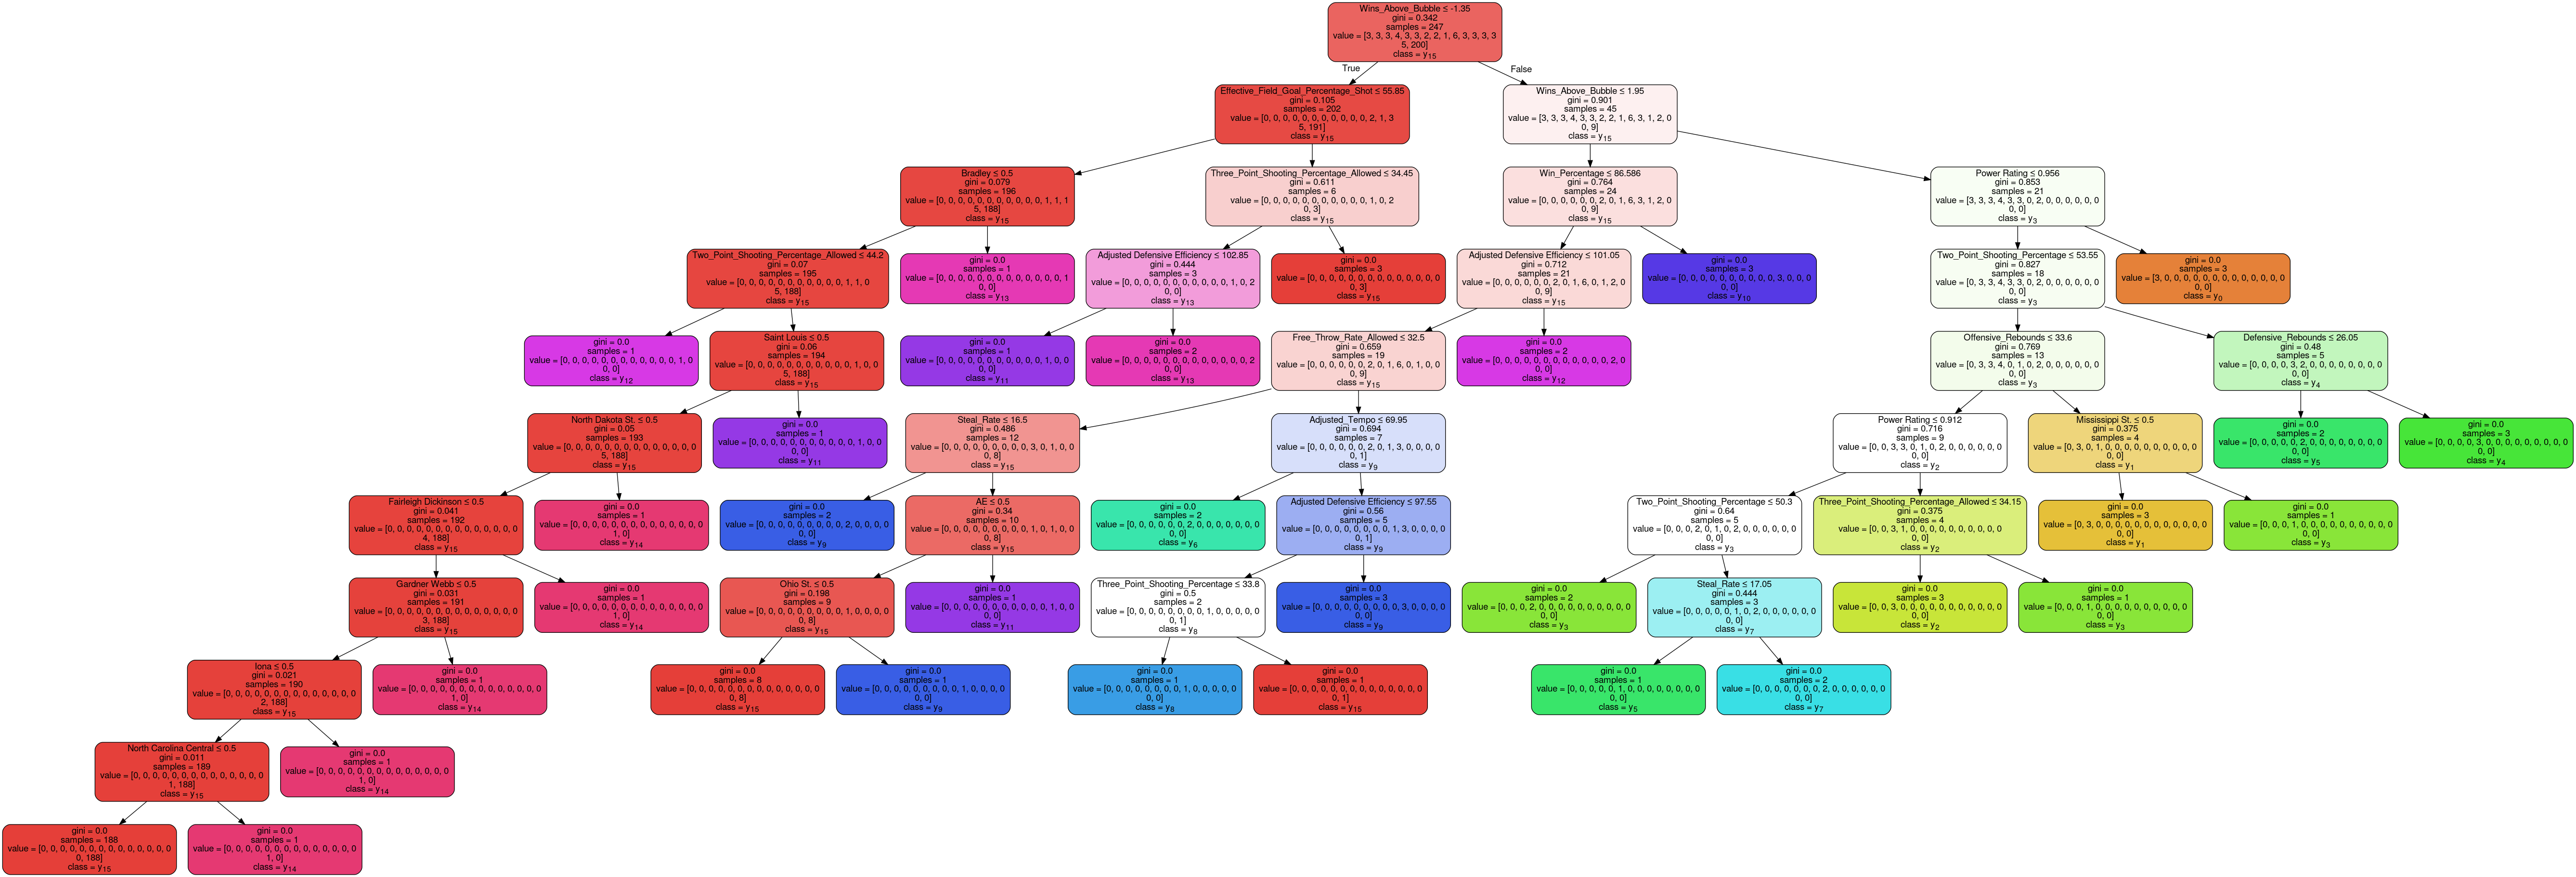

In [52]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1.columns,class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree1.png')
Image(graph.create_png())

In [53]:
# Entrophy Applied
clf_e = DecisionTreeClassifier(criterion="entropy",max_depth=7)
clf_e = clf.fit(X_trainA,y_trainA)
y_hat = clf.predict(X_testA)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_testA, y_hat))

Accuracy: 0.803030303030303


In [55]:
X1.shape[1]

406

In [56]:
feats = clf1.feature_importances_
feats

array([0.        , 0.        , 0.06588482, 0.05641486, 0.02382826,
       0.        , 0.        , 0.04463903, 0.02436053, 0.02844257,
       0.        , 0.02175666, 0.05161799, 0.02287072, 0.01185107,
       0.0454291 , 0.02437934, 0.31920325, 0.        , 0.0400679 ,
       0.        , 0.01922507, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
feats.shape

(406,)

#### FEATURE IMPORTANCE

In [58]:
#!conda install -c districtdatalabs yellowbrick -y

In [59]:
from yellowbrick.model_selection import FeatureImportances

/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


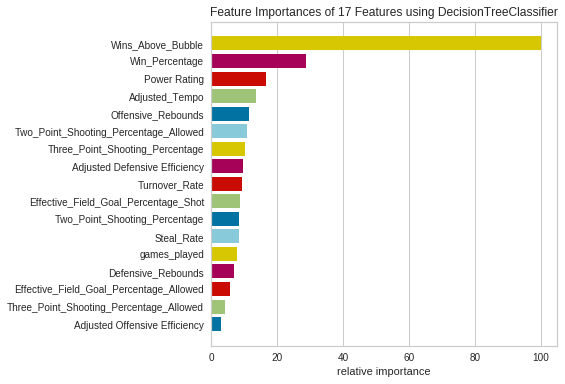

In [60]:
viz = FeatureImportances(clfI)
viz.fit(X_imp, Y)
viz.show()

In [61]:
#plot_feature_importances_cancer(clf1,X1,feats)

In [62]:
range(407)

range(0, 407)

In [63]:
#ordered_dict = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

### RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [65]:
X_trainAr, X_testAr, y_trainAr, y_testAr = train_test_split(X, Y, test_size=0.3, random_state=1)
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X1, Y1, test_size=0.3, random_state=1)
X_trainIr, X_testIr, y_trainIr, y_testIr = train_test_split(X_imp, Y, test_size=0.3, random_state=1)

In [66]:
clfr = RandomForestClassifier()
clf1r = RandomForestClassifier()
clfIr = RandomForestClassifier()

In [67]:
clfr = clfr.fit(X_trainAr,y_trainAr)
clf1r = clf1r.fit(X_trainr,y_trainr)
clfIr = clfIr.fit(X_trainIr,y_trainIr)

In [68]:
y_predr = clfr.predict(X_testAr)
y_hatr = clf1r.predict(X_testr)
y_hr = clfIr.predict(X_testIr)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_testAr, y_predr))

Accuracy: 0.8314393939393939


In [70]:
print("Accuracy:",metrics.accuracy_score(y_testr, y_hatr))

Accuracy: 0.8207547169811321


In [71]:
print("Accuracy:",metrics.accuracy_score(y_testIr, y_hr))

Accuracy: 0.8390151515151515


#### GRAPHS

In [72]:
def plot_pts():
    pass

#### GRADIENT BOOSTING

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [110]:
X.shape, Y.shape

((1757, 21), (1757,))

In [104]:
X_trainAr, X_testAr, y_trainAr, y_testAr = train_test_split(X, Y, test_size=0.3, random_state=1)
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X1, Y1, test_size=0.3, random_state=1)
X_trainIr, X_testIr, y_trainIr, y_testIr = train_test_split(X_imp, Y, test_size=0.3, random_state=1)

In [105]:
learning_list = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [115]:
for learning_rate in learning_list:
    gbs_clf = GradientBoostingClassifier(n_estimators=100,learning_rate=learning_rate, max_depth=1, random_state=0)
    gbs_clfA = GradientBoostingClassifier(n_estimators=100,learning_rate=learning_rate, max_depth=1, random_state=0)
    gbs_clfAI = GradientBoostingClassifier(n_estimators=100,learning_rate=learning_rate, max_depth=1, random_state=0)
    gbs_clf.fit(X_trainr, y_trainr)
    gbs_clfA.fit(X_trainAr, y_trainAr)
    gbs_clfAI.fit(X_trainIr, y_trainIr)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ".format(gbs_clf.score(X_trainr, y_trainr)))
    print("Accuracy score (testing): ".format(gbs_clf.score(X_testr, y_testr)))
    #print("Accuracy score (validation): ".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 
Accuracy score (testing): 
Learning rate:  0.1
Accuracy score (training): 
Accuracy score (testing): 
Learning rate:  0.25
Accuracy score (training): 
Accuracy score (testing): 
Learning rate:  0.5
Accuracy score (training): 
Accuracy score (testing): 
Learning rate:  0.75
Accuracy score (training): 
Accuracy score (testing): 
Learning rate:  1
Accuracy score (training): 
Accuracy score (testing): 


In [113]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): ".format(gbs_clf.score(X_trainr, y_trainr)))
print("Accuracy score (testing): ".format(gbs_clf.score(X_testr, y_testr)))
#print("Accuracy score (validation): ".format(gb_clf.score(X_val, y_val)))

Learning rate:  1
Accuracy score (training): 
Accuracy score (testing): 


#### LINEAR REGRESSION

In [73]:
lss = ["TEAM", "CONF", "wins", "POSTSEASON"]

In [74]:
df_reg = df_n.drop((i for i in lss), axis=1)

In [75]:
df_n.head()

TEAM CONF  games_played  wins  Adjusted Offensive Efficiency  \
0  North Carolina  ACC            40    33                          123.3   
1       Wisconsin  B10            40    36                          129.1   
2        Michigan  B10            40    33                          114.4   
3      Texas Tech  B12            38    31                          115.2   
4         Gonzaga  WCC            39    37                          117.8   

   Adjusted Defensive Efficiency  Power Rating  \
0                           94.9        0.9531   
1                           93.6        0.9758   
2                           90.4        0.9375   
3                           85.2        0.9696   
4                           86.3        0.9728   

   Effective_Field_Goal_Percentage_Shot  \
0                                  52.6   
1                                  54.8   
2                                  53.9   
3                                  53.5   
4                                  56.6   

   Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  ...  \
0                                     48.1           15.4  ...   
1                                     47.7           12.4  ...   
2                                     47.7           14.0  ...   
3                                     43.0           17.7  ...   
4                                     41.1           16.2  ...   

   Two_Point_Shooting_Percentage  Two_Point_Shooting_Percentage_Allowed  \
0                           53.9                                   44.6   
1                           54.8                                   44.7   
2                           54.7                                   46.8   
3                           52.8                                   41.9   
4                           56.3                                   40.0   

   Three_Point_Shooting_Percentage  Three_Point_Shooting_Percentage_Allowed  \
0                             32.7                                     36.2   
1                             36.5                                     37.5   
2                             35.2                                     33.2   
3                             36.5                                     29.7   
4                             38.2                                     29.0   

   Adjusted_Tempo  Wins_Above_Bubble  POSTSEASON  SEED  YEAR  Win_Percentage  
0            71.7                8.6           2   1.0  2016       82.500000  
1            59.3               11.3           2   1.0  2015       90.000000  
2            65.9                6.9           2   3.0  2018       82.500000  
3            67.5                7.0           2   3.0  2019       81.578947  
4            71.5                7.7           2   1.0  2017       94.871795  

[5 rows x 25 columns]

In [76]:
df_reg

games_played  Adjusted Offensive Efficiency  \
0               40                          123.3   
1               40                          129.1   
2               40                          114.4   
3               38                          115.2   
4               39                          117.8   
...            ...                            ...   
1752            35                          111.2   
1753            35                          117.9   
1754            36                          122.8   
1755            35                          117.4   
1756            37                          117.2   

      Adjusted Defensive Efficiency  Power Rating  \
0                              94.9        0.9531   
1                              93.6        0.9758   
2                              90.4        0.9375   
3                              85.2        0.9696   
4                              86.3        0.9728   
...                             ...           ...   
1752                           94.7        0.8640   
1753                           96.6        0.9081   
1754                           95.2        0.9488   
1755                           94.5        0.9238   
1756                           94.9        0.9192   

      Effective_Field_Goal_Percentage_Shot  \
0                                     52.6   
1                                     54.8   
2                                     53.9   
3                                     53.5   
4                                     56.6   
...                                    ...   
1752                                  51.4   
1753                                  51.2   
1754                                  55.3   
1755                                  55.2   
1756                                  57.0   

      Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  Steal_Rate  \
0                                        48.1           15.4        18.2   
1                                        47.7           12.4        15.8   
2                                        47.7           14.0        19.5   
3                                        43.0           17.7        22.8   
4                                        41.1           16.2        17.1   
...                                       ...            ...         ...   
1752                                     46.9           19.2        15.3   
1753                                     49.9           17.9        20.1   
1754                                     48.1           15.8        18.0   
1755                                     44.8           17.1        15.1   
1756                                     47.1           16.1        17.4   

      Offensive_Rebounds  Defensive_Rebounds  ...  Free_Throw_Rate_Allowed  \
0                   40.7                30.0  ...                     30.4   
1                   32.1                23.7  ...                     22.4   
2                   25.5                24.9  ...                     30.0   
3                   27.4                28.7  ...                     36.6   
4                   30.0                26.2  ...                     26.9   
...                  ...                 ...  ...                      ...   
1752                33.9                27.3  ...                     27.6   
1753                36.7                30.8  ...                     33.1   
1754                31.6                30.2  ...                     34.9   
1755                32.1                26.0  ...                     28.1   
1756                33.0                23.1  ...                     29.1   

      Two_Point_Shooting_Percentage  Two_Point_Shooting_Percentage_Allowed  \
0                              53.9                                   44.6   
1                              54.8                                   44.7   
2                              54.7                                   46.8   
3                

In [77]:
df_new1

games_played  Adjusted Offensive Efficiency  \
0               40                          123.3   
1               40                          129.1   
2               40                          114.4   
3               38                          115.2   
4               39                          117.8   
...            ...                            ...   
1752            35                          111.2   
1753            35                          117.9   
1754            36                          122.8   
1755            35                          117.4   
1756            37                          117.2   

      Adjusted Defensive Efficiency  Power Rating  \
0                              94.9        0.9531   
1                              93.6        0.9758   
2                              90.4        0.9375   
3                              85.2        0.9696   
4                              86.3        0.9728   
...                             ...           ...   
1752                           94.7        0.8640   
1753                           96.6        0.9081   
1754                           95.2        0.9488   
1755                           94.5        0.9238   
1756                           94.9        0.9192   

      Effective_Field_Goal_Percentage_Shot  \
0                                     52.6   
1                                     54.8   
2                                     53.9   
3                                     53.5   
4                                     56.6   
...                                    ...   
1752                                  51.4   
1753                                  51.2   
1754                                  55.3   
1755                                  55.2   
1756                                  57.0   

      Effective_Field_Goal_Percentage_Allowed  Turnover_Rate  Steal_Rate  \
0                                        48.1           15.4        18.2   
1                                        47.7           12.4        15.8   
2                                        47.7           14.0        19.5   
3                                        43.0           17.7        22.8   
4                                        41.1           16.2        17.1   
...                                       ...            ...         ...   
1752                                     46.9           19.2        15.3   
1753                                     49.9           17.9        20.1   
1754                                     48.1           15.8        18.0   
1755                                     44.8           17.1        15.1   
1756                                     47.1           16.1        17.4   

      Offensive_Rebounds  Defensive_Rebounds  ...  Wichita St.  \
0                   40.7                30.0  ...            0   
1                   32.1                23.7  ...            0   
2                   25.5                24.9  ...            0   
3                   27.4                28.7  ...            0   
4                   30.0                26.2  ...            0   
...                  ...                 ...  ...          ...   
1752                33.9                27.3  ...            0   
1753                36.7                30.8  ...            0   
1754                31.6                30.2  ...            0   
1755                32.1                26.0  ...            0   
1756                33.0                23.1  ...            0   

      William & Mary  Winthrop  Wisconsin  Wofford  Wright St.  Wyoming  \
0                  0         0          0        0           0        0   
1                  0         0          1        0           0        0   
2                  0         0          0        0           0        0   
3                  0         0          0        0           0        0   
4                  0         0          0        0           0        0   
...              ...   

In [78]:
df_reg_wo = df_reg.drop("SEED", axis=1)

In [79]:
#df_reg_wo1 = df_reg_wo.drop("Power Rating", axis=1)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [93]:
X2 = df_reg_wo1
Y2 = df_reg['SEED']

In [82]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X2, Y2, test_size=0.3, random_state=1)

In [83]:
reg = LinearRegression()
reg = reg.fit(X_train_reg, y_train_reg)

In [84]:
y_predict = reg.predict(X_test_reg)

In [85]:
print("R-Squared:",r2_score(y_test_reg, y_predict))

R-Squared: 0.5966666237995943


#### OLS - STATSMODEL

In [86]:
import statsmodels.api as sm

In [100]:
X = sm.add_constant(df_reg_wo)
y = df_reg['SEED']

In [101]:
mod = sm.OLS(y, X)

In [102]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   SEED   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:48:11   Log-Likelihood:                -3888.8
No. Observations:                1757   AIC:                             7820.
Df Residuals:                    1736   BIC:                             7934.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### GRAPHS

#### LINEAR REGRESSION Breaks when adding categorical variables - PROCEED TO LOGISTIC REGRESSION

In [90]:
X9 = sm.add_constant(data_2019_new)
y9 = data_2019['SEED']

In [91]:
mod1 = sm.OLS(y9, X9)

In [92]:
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   SEED   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                nan
Time:                        14:41:07   Log-Likelihood:                 8657.0
No. Observations:                 353   AIC:                        -1.661e+04
Df Residuals:                       0   BIC:                        -1.524e+04
Df Model:                         352                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/home/ehi58/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/ehi58/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/ehi58/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
